In [1]:
import sys,os
sys.path.append(os.path.abspath(r"E:\Study Material\Python_Machine_AI\Deep Learning_Lessons\Praktisch\Tensorflow\Projects\Semantic Segmentation FCN"))

In [2]:
import json
import yaml
import warnings
import matplotlib.pyplot as plt
import tensorflow as tf
from Data_Generator.DataGenerator import DataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from PreProcessing.preprocess_functions import Read_Image,Read_mask,Augment_me,One_Hot_Encoder
from Model import Encoder,Decoder
import numpy as np
from PIL import Image,ImageStat
from albumentations import channel_shuffle,Blur,RGBShift,RandomBrightness,RandomResizedCrop
from Model.Main_Model import FCN_Model
from Training.Trainer import Train_FCN

In [10]:
Config_path = r"E:\Study Material\Python_Machine_AI\Deep Learning_Lessons\Praktisch\Tensorflow\Projects\Semantic Segmentation FCN\Configuration\config.yaml"

In [11]:
warnings.filterwarnings('ignore',category = DeprecationWarning)
warnings.filterwarnings('ignore',category = UserWarning)
with open(Config_path) as f:
    config = yaml.load(f)

c:\users\gopu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


In [5]:
def Read_Data(path,is_train = True):
  temp = []
  updated_path = os.path.join(path,"VOC2012_train_val","ImageSets","Segmentation","train.txt" if is_train else "val.txt")
  with open(updated_path,"r") as file_:
    Instances = file_.read().split()
    for img in Instances:
      path_img = os.path.join(path,"VOC2012_train_val","JPEGImages",img+".jpg")
      path_label = os.path.join(path,"VOC2012_train_val","SegmentationClass",img+".png")
      temp.append([path_img,path_label])
  return temp

In [6]:
path = config["dataset"]
Train = Read_Data(path=path,is_train=True)
Val = Read_Data(path=path,is_train=False)

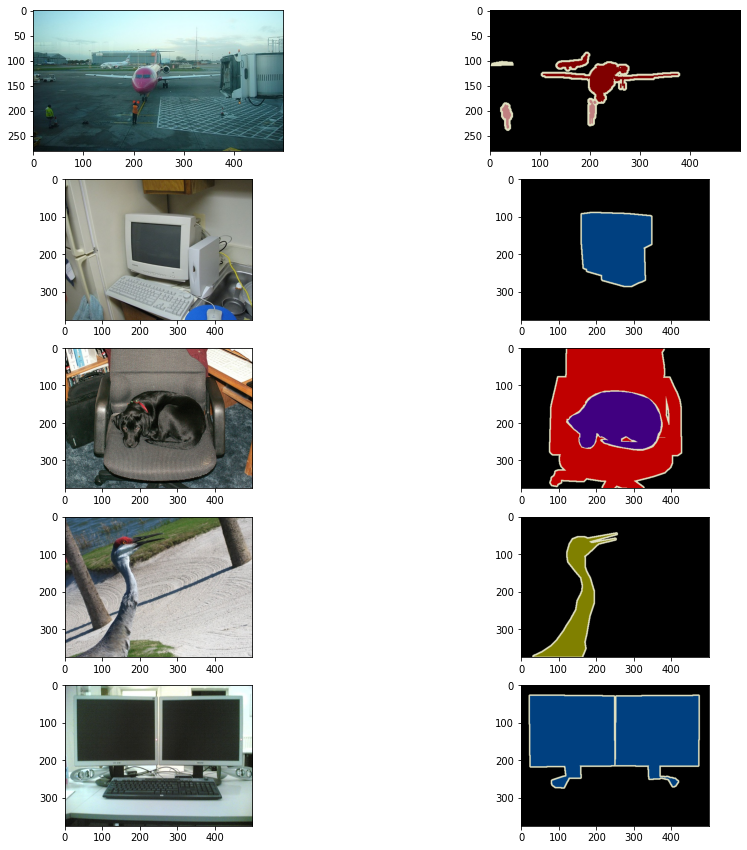

In [7]:
plt.figure(figsize=(15,15))
idx = 0
img = 0
mask = 0
for instance in Train[:5]:
  plt.subplot(5,2,idx+1)  
  img = Image.open(instance[0])
  plt.imshow(img)
  plt.subplot(5,2,idx+2)  
  mask = Image.open(instance[1])
  plt.imshow(mask)
  idx += 2

In [8]:
# Creating the DataGenerator

train_generator = DataGenerator(config,Train,use_aug=config["Data_Aug"]["use_aug"])
Val_generator = DataGenerator(config,Val,use_aug=config["Data_Aug"]["use_aug"])

In [9]:
# Loading the Model
model = FCN_Model(config)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Layer (InputLayer)        [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 424, 424, 3)  0           Input_Layer[0][0]                
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           multiple             1792        zero_padding2d[0][0]             
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           multiple             36928       block1_conv1[1][0]               
______________________________________________________________________________________________

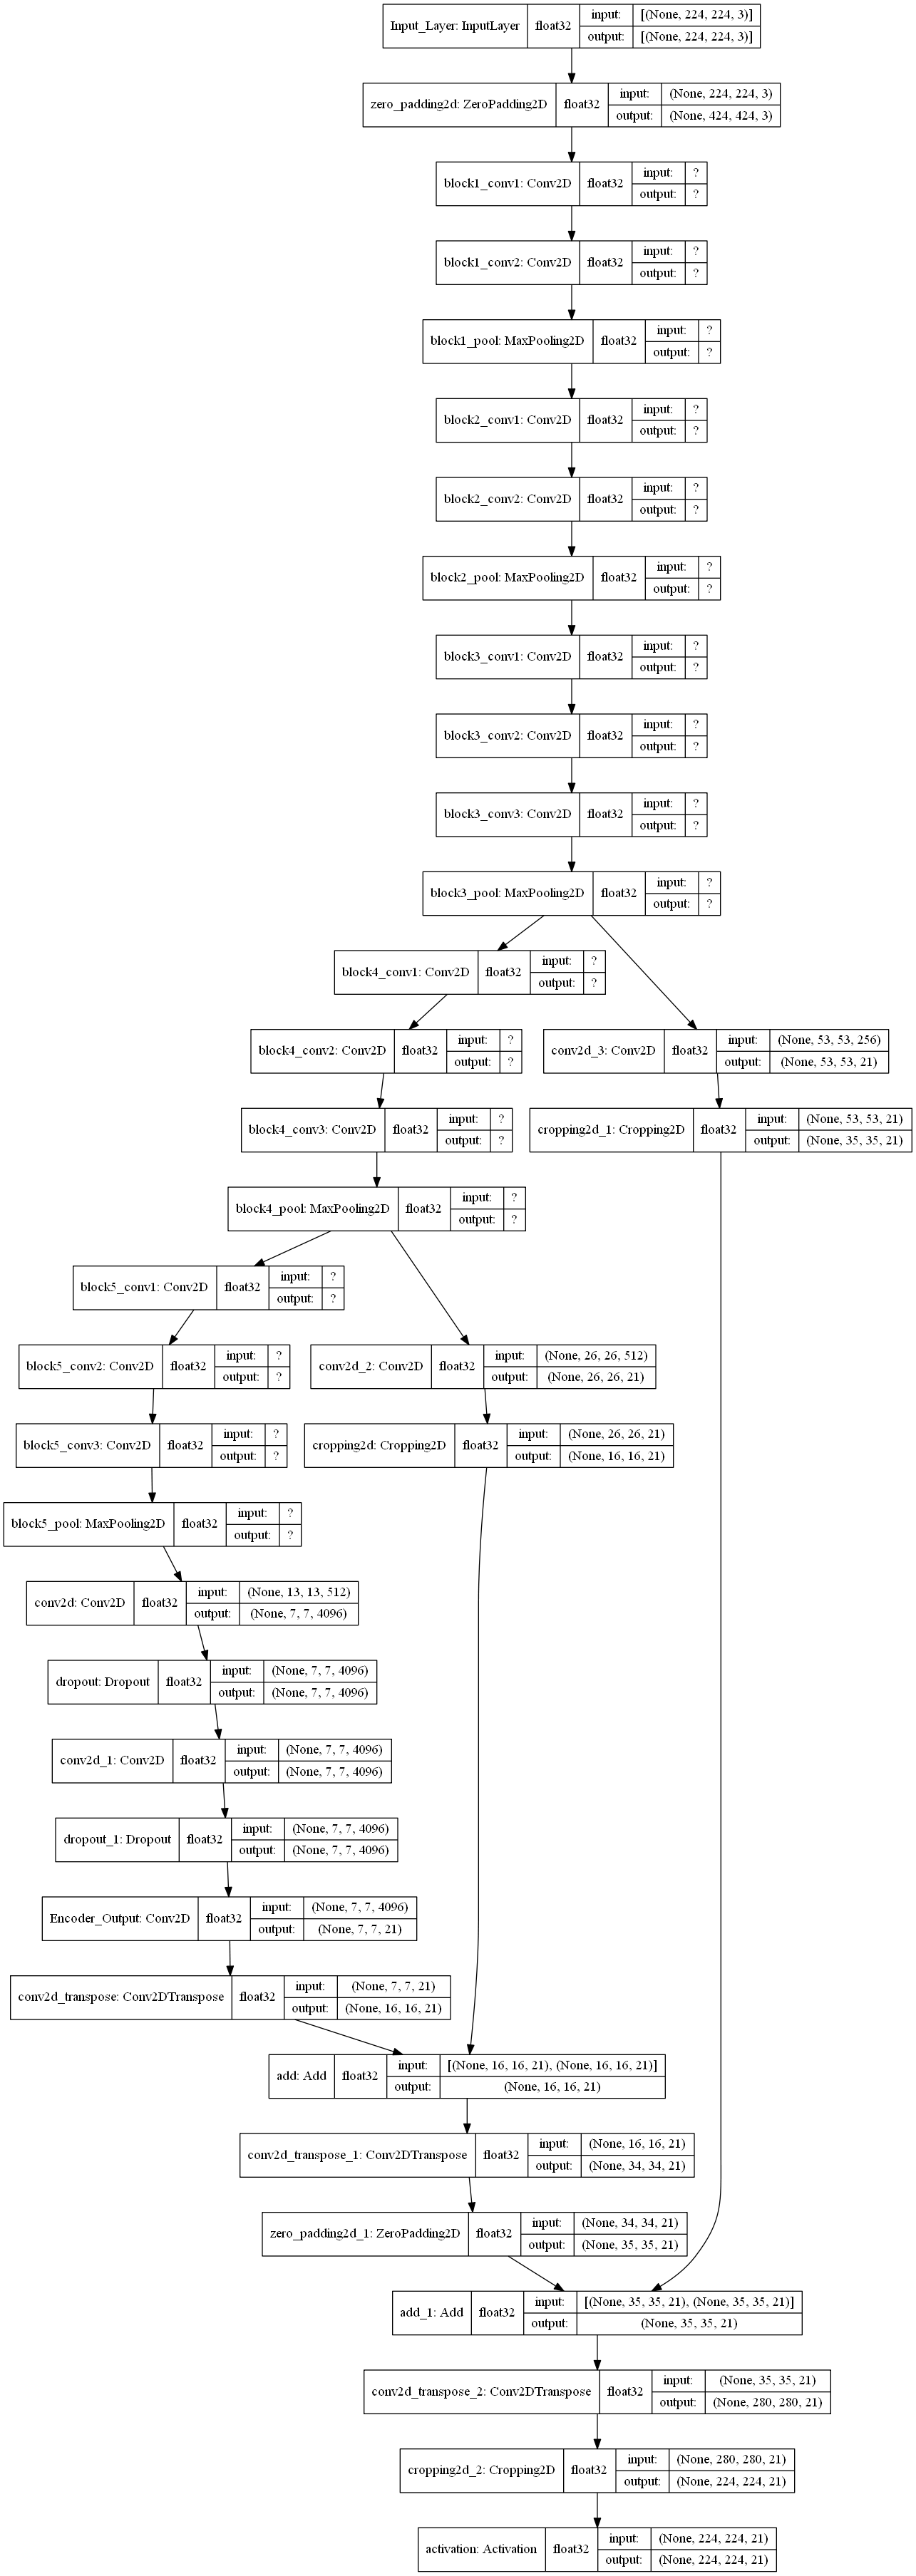

In [13]:
tf.keras.utils.plot_model(model,show_dtype=True,show_layer_names=True,show_shapes = True,to_file = config["Network"]["modelpath"])

In [14]:
trainer = Train_FCN(config=config,model=model,Train_Generator=train_generator,Val_Generator=Val_generator,Train_Size=len(Train))

In [15]:
trainer.Train()

Saving Weights E:\Study Material\Python_Machine_AI\Deep Learning_Lessons\Praktisch\Tensorflow\Projects\Semantic Segmentation FCN\Generated\graph.json
Epoch 1/300


KeyboardInterrupt: 